## Regression Analysis

Now that our data is properly cleaned, it is ready for regression. We can split this into two steps:

1) Regression Exploratory Analysis
2) Model Optimization

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV, LinearRegression
import seaborn as sns


### Exploratory Analysis for Regression

First let's load the cleaned dataset. We will do this demonstration on the high income segment of the original population. The dataframe has some information about each business, the area each business is contained in, as well as sentiment analysis of keyword mentions in the user reviews for each business.

In [31]:
grouped_data = pd.read_csv('Low_Grouped.csv')

grouped_data.head()

,name,Unnamed: 0,postal_code,latitude,longitude,stars,review_count,is_open,Unnamed: 0.1,Zip Code,...,Median Household Income,Avg Commute Time,review_stars,Management,Atmosphere,Sanitation,Speed,Service,Food,High End
0,'Ohana,124502.620658,32830.0,28.405163,-81.583242,4.0,1065.0,1.0,0.0,32830.0,...,35000.0,0.0,4.041133,0.338374,0.557899,0.162988,0.234307,0.301519,0.458047,0.486640
1,081 Wood Fired Pizza,61556.400000,32801.0,28.540765,-81.377648,4.5,20.0,0.0,0.0,32801.0,...,32992.0,19.7,4.700000,0.077200,0.624900,0.340000,0.540500,0.388450,0.407321,0.462420
2,10 Barrel Brewing Portland,857487.002088,97209.0,45.525984,-122.685468,4.0,942.0,1.0,0.0,97209.0,...,30833.0,23.3,3.955115,0.240997,0.597809,0.506141,0.306973,0.344668,0.550435,0.418221
3,101 By Teahaus,323466.608365,78752.0,30.337121,-97.716716,4.0,256.0,1.0,0.0,78752.0,...,36697.0,24.1,3.866920,0.246808,0.603185,0.625565,0.272090,0.399359,0.403279,0.365481
4,11th Street Station,852249.307692,78702.0,30.269190,-97.729194,3.0,39.0,0.0,0.0,78702.0,...,27695.0,21.1,3.179487,0.205975,0.288275,0.149440,0.235328,0.063539,0.235375,0.442269


In order to run the regression, the dataframe needs to be split into X (features) and Y (target). Y is the average stars for reviews given to the business (review_stars). X is all other columns, minus the target and some other unformatted, irrelevant variables.

In [32]:
x = grouped_data.drop(columns = ['review_stars', 'stars', 'Unnamed: 0', 'Unnamed: 0.1','name'])
x = sm.add_constant(x)

y = grouped_data['review_stars']

x.head(10)


/Users/kenhua/opt/anaconda3/envs/metis/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,postal_code,latitude,longitude,review_count,is_open,Zip Code,Population,Median Household Income,Avg Commute Time,Management,Atmosphere,Sanitation,Speed,Service,Food,High End
0,1.0,32830.0,28.405163,-81.583242,1065.0,1.0,32830.0,26.0,35000.0,0.0,0.338374,0.557899,0.162988,0.234307,0.301519,0.458047,0.486640
1,1.0,32801.0,28.540765,-81.377648,20.0,0.0,32801.0,12050.0,32992.0,19.7,0.077200,0.624900,0.340000,0.540500,0.388450,0.407321,0.462420
2,1.0,97209.0,45.525984,-122.685468,942.0,1.0,97209.0,14950.0,30833.0,23.3,0.240997,0.597809,0.506141,0.306973,0.344668,0.550435,0.418221
3,1.0,78752.0,30.337121,-97.716716,256.0,1.0,78752.0,18064.0,36697.0,24.1,0.246808,0.603185,0.625565,0.272090,0.399359,0.403279,0.365481
4,1.0,78702.0,30.269190,-97.729194,39.0,0.0,78702.0,21334.0,27695.0,21.1,0.205975,0.288275,0.149440,0.235328,0.063539,0.235375,0.442269
5,1.0,78741.0,30.245321,-97.730319,641.0,1.0,78741.0,44935.0,31569.0,24.0,0.473627,0.550566,0.549852,0.318655,0.539713,0.488674,0.481042
6,1.0,2111.0,42.351164,-71.061001,336.0,1.0,2111.0,7383.0,31116.0,19.4,0.046475,0.457633,0.081436,0.235222,0.152361,0.412588,0.414484
7,1.0,43215.0,39.955023,-82.998457,18.0,0.0,43215.0,12790.0,29151.0,16.2,0.665383,0.533150,0.750600,0.186355,0.178410,0.361921,0.463319
8,1.0,80544.0,40.103291,-105.172771,163.0,1.0,80544.0,111.0,0.0,0.0,0.538066,0.627197,0.398112,0.346866,0.466927,0.495763,0.421466
9,1.0,97205.0,45.520992,-122.683462,141.0,1.0,97205.0,7688.0,25373.0,23.9,0.366644,0.553547,0.379850,0.451015,0.549993,0.643022,0.392202


We run an initial OLS model using statsmodule package. We can see a decently high R-squared of 0.706, and an adjusted R-squared of 0.704. There are a few variables with low coefficients and high P values which we can examine later.

In [33]:
model_statsmodule = sm.OLS(endog = y, exog = x)

fit = model_statsmodule.fit()
print(fit.summary())


                            OLS Regression Results                            
Dep. Variable:           review_stars   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     563.3
Date:                Sun, 12 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:33:44   Log-Likelihood:                -951.14
No. Observations:                3578   AIC:                             1934.
Df Residuals:                    3562   BIC:                             2033.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

We use VIF to identify high collinearity. There are a few that are high, but most variables are within 1-2, which is good.

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = fit.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
list(zip(x.columns, vif))


/Users/kenhua/opt/anaconda3/envs/metis/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('const', 230.9971759954068),
 ('postal_code', inf),
 ('latitude', 1.8826034335435196),
 ('longitude', 18.51233972952178),
 ('review_count', 1.0793234414616144),
 ('is_open', 1.069603411721878),
 ('Zip Code', inf),
 ('Population', 1.5038221249460109),
 ('Median Household Income', 1.3177326063809907),
 ('Avg Commute Time', 1.521613277659795),
 ('Management', 1.342361901335086),
 ('Atmosphere', 1.1237423963006201),
 ('Sanitation', 1.1898959515870287),
 ('Speed', 1.4074747902419276),
 ('Service', 1.8607633769774312),
 ('Food', 1.4069945210890336),
 ('High End', 1.2195535785201823)]

Now, it's clear that certain variables should be dropped. Lets drop the features that are irrelevant, or have high P value

In [38]:
x_removed_2 = x.drop(columns = ['postal_code','longitude','latitude', 'Zip Code','review_count','Median Household Income','Population', 'Avg Commute Time'])
model_removed_2 = sm.OLS(endog = y, exog = x_removed_2)

fit_2 = model_removed_2.fit()
print(fit_2.summary())


                            OLS Regression Results                            
Dep. Variable:           review_stars   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     1023.
Date:                Sun, 12 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:40:27   Log-Likelihood:                -993.46
No. Observations:                3578   AIC:                             2005.
Df Residuals:                    3569   BIC:                             2061.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0127      0.025     81.823      0.0

<AxesSubplot:xlabel='Food', ylabel='review_stars'>

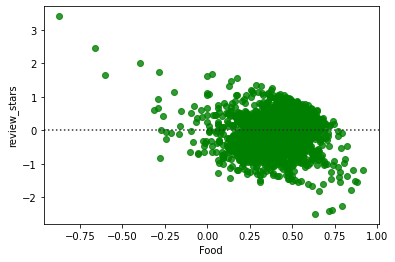

In [42]:
sns.residplot(x=x_removed_2['Food'], y=y, color="g")


<AxesSubplot:xlabel='Food', ylabel='review_stars'>

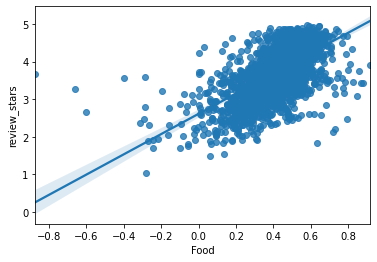

In [40]:
sns.regplot(x=x_removed_2['Food'], y=y)


### Model Optimization

Now that we have the final features chosen for our report, let's try to use validation, regularization and other methods to obtain best possible model. 

First, do perform validation, we need to. So we use this function to split the data into a training/validation split of 80/20. 

In [43]:
from sklearn.model_selection import train_test_split


def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)

    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 


Performing the simple validation with a linear regression model, we get similar R^2 and coefficients as we saw above.

In [44]:
split_and_validate(x_removed_2,y)



Validation R^2 score was: 0.6845029799169309
Feature coefficient results: 

const : 0.00
is_open : 0.10
Management : 0.38
Atmosphere : 0.06
Sanitation : 0.13
Speed : 0.92
Service : 1.33
Food : 1.17
High End : 0.88


Let's try ridge regression with Cross Validation.

In [45]:
X_train, X_val, y_train, y_val = \
        train_test_split(x_removed_2, y, test_size=0.2, random_state=42)


In [46]:
alphavec = 10**np.linspace(-2,2,200)

ridge_model_cv = RidgeCV(alphas = alphavec, cv=5)
ridge_model_cv.fit(X_train, y_train)

ridge_model_cv.alpha_
print('\nTraining R^2 score was:', ridge_model_cv.score(X_train, y_train))
print('\nValidation R^2 score was:' , ridge_model_cv.score(X_val, y_val))



Training R^2 score was: 0.6990188617455371

Validation R^2 score was: 0.684455020606241


In [47]:
list(zip(x_removed_2.columns, ridge_model_cv.coef_))


[('const', 0.0),
 ('is_open', 0.09775951427119009),
 ('Management', 0.3849317932637514),
 ('Atmosphere', 0.06530869312421975),
 ('Sanitation', 0.1305776855180544),
 ('Speed', 0.9073845051762127),
 ('Service', 1.3257501470324777),
 ('Food', 1.161609066154652),
 ('High End', 0.8714035804523199)]

In [48]:
ridge_model_cv.alpha_

0.4659525668664682

The model improved with a ridge regularization term included. Let's try lasso regularization

In [49]:
lasso_model_cv = LassoCV(alphas = alphavec, cv=5)
lasso_model_cv.fit(X_train, y_train)

print('\nTraining R^2 score was:', lasso_model_cv.score(X_train, y_train))
print('\nValidation R^2 score was:' ,lasso_model_cv.score(X_val, y_val))




Training R^2 score was: 0.6521724650706525

Validation R^2 score was: 0.6292729960095222


In [50]:
list(zip(x.columns, lasso_model_cv.coef_))


[('const', 0.0),
 ('postal_code', 0.08304073501101687),
 ('latitude', 0.37651265602617084),
 ('longitude', 0.0),
 ('review_count', 0.13560787611226552),
 ('is_open', 0.0313468181419993),
 ('Zip Code', 1.4258490589139834),
 ('Population', 0.9046270461717753),
 ('Median Household Income', 0.44154263257856796)]

In [51]:
lasso_model_cv.alpha_


0.01